# Data Analysis and Reporting

## Objective

In this final phase, I will conduct exploratory data analysis (EDA) on the cleaned and enhanced lead dataset.
This will help me to identify key insights, and create visualizations. 
By doing so i can answer find out for example:

- How leads are distributed across different countries.
- Whether there are any data quality issues, such as missing or inconsistent information.
- Insights into the overall structure and completeness of the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# reading updated dataset
lead_dataset = pd.read_csv('final_lead_dataset_updated.csv')

### 1. Exploratory Data Analysis

I will use some of the main Pandas methods to explore the data

In [23]:
lead_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   firma             4213 non-null   object 
 1   street            4213 non-null   object 
 2   plz               4183 non-null   object 
 3   city              4161 non-null   object 
 4   country           4212 non-null   object 
 5   country_code      4212 non-null   float64
 6   local_number      4212 non-null   object 
 7   long_number_flag  1157 non-null   object 
dtypes: float64(1), object(7)
memory usage: 263.4+ KB


- the country code was initially converted to **int**
- But it appears as a **float** because pandas automatically converts columns to float64 when they contain missing values (NaN), as integers cannot store NaN values

In [12]:
# Check basic statistics
lead_dataset.describe()

,country_code
count,4212.000000
mean,48.364198
std,1.990557
min,41.000000
25%,49.000000
50%,49.000000
75%,49.000000
max,49.000000


In [15]:
# count of leads for each country (DE, AT, CH) in the dataset
lead_dataset['country'].value_counts()

country
DE    3814
AT     253
CH     145
Name: count, dtype: int64

In [17]:
# count of leads for each country code (49, 43, 41) in the dataset
lead_dataset['country_code'].value_counts()

country_code
49.0    3814
43.0     253
41.0     145
Name: count, dtype: int64

In [21]:
# Check for missing values in the dataset
print(lead_dataset.isnull().sum())

firma                  0
street                 0
plz                   30
city                  52
country                1
country_code           1
local_number           1
long_number_flag    3056
dtype: int64


- 3056 missing entries, which indicates that the long number flag was not applied to many rows
- 1 local number missing as seen previously is for the Business information that could not be found by the API


In [29]:
# unique values for each column
lead_dataset.nunique()

firma               4105
street              4130
plz                 2723
city                1922
country                3
country_code           3
local_number        4205
long_number_flag       2
dtype: int64

In [31]:
# duplicates
lead_dataset.duplicated().sum()

1

### Visualisation

A bar chart will help me understand the distribution of leads across different countries. This helps us identify which regions have the highest concentration of leads. 

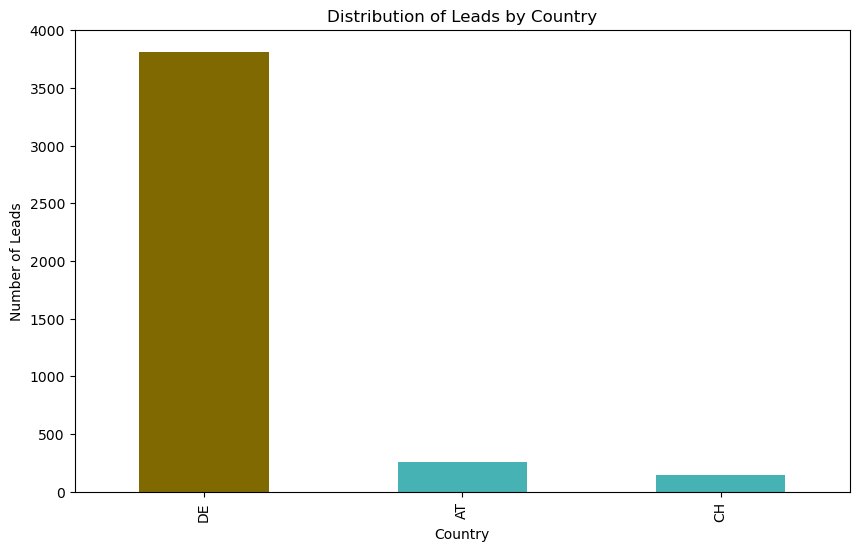

In [46]:
# Grouping by country and then counting the number of leads in each
lead_distribution = lead_dataset['country'].value_counts()

# Define colors for the bars, maroon for the highest, green for the lowest
colors = ['#806900' if country == 'DE' else '#46b2b4' for country in lead_distribution.index]

# Plot the distribution with updated colors
plt.figure(figsize=(10,6))
lead_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Leads by Country')
plt.xlabel('Country')
plt.ylabel('Number of Leads')
plt.show()
